## KNN implementation on Iris Data Set (PCA)

### Steps :-
### 1. PCA
### 2. KNN

# Principal Component Analysis on Iris Data Set

### Libraries

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline

### The Data

In [101]:
from sklearn.datasets import load_iris

In [102]:
iris = load_iris()

In [103]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [104]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [105]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [106]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Step by step Principal Component Analysis

## 1. Standardization of Data

In [107]:
original_data = pd.DataFrame(iris['data'],columns=iris['feature_names'])

original_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [108]:
original_data.describe().loc[['mean','std']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238


In [109]:
# just counting if any mean or std of any band or feature is 0

count = 0
for i in original_data.describe().loc[['mean','std']].loc['mean']:
    if i ==0 :
        count = count + 1
print(count)

count = 0
for i in original_data.describe().loc[['mean','std']].loc['std']:
    if i == 0 :
        count = count + 1
print(count)

0
0


In [110]:
# standardizing the data

l = list()
data = dict()

for i in original_data.columns:
    mean = original_data[i].mean()
    std = original_data[i].std()

    for x in original_data[i]:
        z = (x - mean) / std
        l.append(z)

    data[i] = l
    l = list()

data

{'sepal length (cm)': [-0.8976738791967672,
  -1.1392004834649543,
  -1.3807270877331426,
  -1.5014903898672372,
  -1.0184371813308608,
  -0.5353839727944845,
  -1.5014903898672372,
  -1.0184371813308608,
  -1.7430169941354243,
  -1.1392004834649543,
  -0.5353839727944845,
  -1.259963785599049,
  -1.259963785599049,
  -1.863780296269519,
  -0.05233076425810914,
  -0.1730940663922027,
  -0.5353839727944845,
  -0.8976738791967672,
  -0.1730940663922027,
  -0.8976738791967672,
  -0.5353839727944845,
  -0.8976738791967672,
  -1.5014903898672372,
  -0.8976738791967672,
  -1.259963785599049,
  -1.0184371813308608,
  -1.0184371813308608,
  -0.7769105770626726,
  -0.7769105770626726,
  -1.3807270877331426,
  -1.259963785599049,
  -0.5353839727944845,
  -0.7769105770626726,
  -0.4146206706603909,
  -1.1392004834649543,
  -1.0184371813308608,
  -0.4146206706603909,
  -1.1392004834649543,
  -1.7430169941354243,
  -0.8976738791967672,
  -1.0184371813308608,
  -1.6222536920013308,
  -1.743016994135

In [111]:
standardized_data = pd.DataFrame(data)

standardized_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


In [112]:
standardized_data.describe().loc[['mean','std']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mean,-1.457168e-15,-1.638319e-15,-1.292300e-15,-5.543714e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## 2. Calculate the covariance matrix

In [113]:
standardized_data.cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## 3. Calculate eigenvalues and eigenvectors

In [114]:
from numpy.linalg import eig

In [115]:
a = standardized_data.cov()
a

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [116]:
w,v=eig(a)
print('eigenvalues :\n', w)
print()
print('eigenvectors :\n', v)

eigenvalues :
 [2.91849782 0.91403047 0.14675688 0.02071484]

eigenvectors :
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


## 4. Sort the eigenvector in descending order based on eigenvalues and form feature vector

In [117]:
a

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [118]:
a.shape

(4, 4)

In [119]:
eigen_number = a.shape[0]
eigen_number

4

In [120]:
# grabbing the eigenectors from 'v'

l = list()

for i in range(eigen_number):
    s = v[:,i]
    s2 = s.reshape(eigen_number,1)
    l.append(s2)

l

[array([[ 0.52106591],
        [-0.26934744],
        [ 0.5804131 ],
        [ 0.56485654]]),
 array([[-0.37741762],
        [-0.92329566],
        [-0.02449161],
        [-0.06694199]]),
 array([[-0.71956635],
        [ 0.24438178],
        [ 0.14212637],
        [ 0.63427274]]),
 array([[ 0.26128628],
        [-0.12350962],
        [-0.80144925],
        [ 0.52359713]])]

In [121]:
l[0]

array([[ 0.52106591],
       [-0.26934744],
       [ 0.5804131 ],
       [ 0.56485654]])

In [122]:
len(l)

4

In [123]:
# sorting eigenvector based on eigenvalues

for i in range(len(w)):
    for j in range(i+1,len(w)):
        if w[j] > w[i] :
            temp = w[i]
            w[i] = w[j]
            w[j] = temp

            temp2 = l[i]
            l[i] = l[j]
            l[j] = temp2

print(w)
print(l)

[2.91849782 0.91403047 0.14675688 0.02071484]
[array([[ 0.52106591],
       [-0.26934744],
       [ 0.5804131 ],
       [ 0.56485654]]), array([[-0.37741762],
       [-0.92329566],
       [-0.02449161],
       [-0.06694199]]), array([[-0.71956635],
       [ 0.24438178],
       [ 0.14212637],
       [ 0.63427274]]), array([[ 0.26128628],
       [-0.12350962],
       [-0.80144925],
       [ 0.52359713]])]


In [124]:
np.hstack(l)

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [125]:
# forming feature vector

V = np.hstack(l)
V

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [126]:
V.shape

(4, 4)

## 5. Calculate the principal components

In [127]:
D = standardized_data
D

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


In [128]:
V

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [129]:
transformed_table = np.dot(D,V)
transformed_table

array([[-2.25714118e+00, -4.78423832e-01, -1.27279624e-01,
         2.40875085e-02],
       [-2.07401302e+00,  6.71882687e-01, -2.33825517e-01,
         1.02662845e-01],
       [-2.35633511e+00,  3.40766425e-01,  4.40539002e-02,
         2.82823051e-02],
       [-2.29170679e+00,  5.95399863e-01,  9.09852971e-02,
        -6.57353401e-02],
       [-2.38186270e+00, -6.44675659e-01,  1.56856473e-02,
        -3.58028703e-02],
       [-2.06870061e+00, -1.48420530e+00,  2.68782498e-02,
         6.58611612e-03],
       [-2.43586845e+00, -4.74851181e-02,  3.34350297e-01,
        -3.66527670e-02],
       [-2.22539189e+00, -2.22403002e-01, -8.83993519e-02,
        -2.45299187e-02],
       [-2.32684533e+00,  1.11160370e+00,  1.44592465e-01,
        -2.67695403e-02],
       [-2.17703491e+00,  4.67447569e-01, -2.52918268e-01,
        -3.97660677e-02],
       [-2.15907699e+00, -1.04020587e+00, -2.67784001e-01,
         1.66755027e-02],
       [-2.31836413e+00, -1.32633999e-01,  9.34461909e-02,
      

In [130]:
transformed_table = pd.DataFrame(transformed_table)
transformed_table

,0,1,2,3
0,-2.257141,-0.478424,-0.127280,0.024088
1,-2.074013,0.671883,-0.233826,0.102663
2,-2.356335,0.340766,0.044054,0.028282
3,-2.291707,0.595400,0.090985,-0.065735
4,-2.381863,-0.644676,0.015686,-0.035803
...,...,...,...,...
145,1.864258,-0.385674,0.255418,0.387957
146,1.559356,0.893693,-0.026283,0.219457
147,1.516091,-0.268171,0.179577,0.118773
148,1.368204,-1.007878,0.930279,0.026041


In [131]:
len(transformed_table.columns)

4

In [132]:
l = list()

for i in range(len(transformed_table.columns)):
    count = i + 1
    s = 'PC' + str(count)
    l.append(s)
l

['PC1', 'PC2', 'PC3', 'PC4']

In [133]:
transformed_table.columns = l

In [134]:
transformed_table

,PC1,PC2,PC3,PC4
0,-2.257141,-0.478424,-0.127280,0.024088
1,-2.074013,0.671883,-0.233826,0.102663
2,-2.356335,0.340766,0.044054,0.028282
3,-2.291707,0.595400,0.090985,-0.065735
4,-2.381863,-0.644676,0.015686,-0.035803
...,...,...,...,...
145,1.864258,-0.385674,0.255418,0.387957
146,1.559356,0.893693,-0.026283,0.219457
147,1.516091,-0.268171,0.179577,0.118773
148,1.368204,-1.007878,0.930279,0.026041


In [135]:
transformed_table.describe()

,PC1,PC2,PC3,PC4
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.814845e-15,2.319094e-15,-1.221245e-16,5.747255e-16
std,1.708361e+00,9.560494e-01,3.830886e-01,1.439265e-01
min,-2.765081e+00,-2.677315e+00,-8.545590e-01,-4.878491e-01
25%,-2.095701e+00,-5.920508e-01,-2.581963e-01,-7.442836e-02
50%,4.169144e-01,-1.744359e-02,2.467973e-02,6.804996e-03
75%,1.338543e+00,5.964892e-01,1.938639e-01,9.057919e-02
max,3.299641e+00,2.645211e+00,1.002044e+00,4.681284e-01


In [136]:
transformed_table.describe().loc[['mean','std']]

,PC1,PC2,PC3,PC4
mean,-1.814845e-15,2.319094e-15,-1.221245e-16,5.747255e-16
std,1.708361e+00,9.560494e-01,3.830886e-01,1.439265e-01


In [137]:
for i in transformed_table.columns :
    print(i)
    print('mean :\t',transformed_table[i].mean())
    print('variance :\t',transformed_table[i].var())
    print()

PC1
mean :	 -1.8148445709205893e-15
variance :	 2.9184978165319935

PC2
mean :	 2.3190939909175273e-15
variance :	 0.9140304714680711

PC3
mean :	 -1.2212453270876723e-16
variance :	 0.1467568755713152

PC4
mean :	 5.747254524142894e-16
variance :	 0.02071483642861919



## 6. Feature Extraction

In [138]:
total_variance = 0
for i in transformed_table.columns :
    total_variance = total_variance + transformed_table[i].var()
print(total_variance)

3.999999999999999


In [139]:
cumulative_var = 0
temp_dict = dict()
l = list()

for i in transformed_table.columns :
    var = transformed_table[i].var()
    l.append(var)

    var_in_percentage = (var * 100) / total_variance
    l.append(var_in_percentage)

    cumulative_var = cumulative_var + var_in_percentage
    l.append(cumulative_var)

    temp_dict[i] = l

    l = list()

temp_dict


{'PC1': [2.9184978165319935, 72.96244541329985, 72.96244541329985],
 'PC2': [0.9140304714680711, 22.85076178670178, 95.81320720000163],
 'PC3': [0.1467568755713152, 3.6689218892828808, 99.48212908928451],
 'PC4': [0.02071483642861919, 0.5178709107154799, 99.99999999999999]}

In [140]:
final_table = pd.DataFrame(temp_dict)
final_table

,PC1,PC2,PC3,PC4
0,2.918498,0.914030,0.146757,0.020715
1,72.962445,22.850762,3.668922,0.517871
2,72.962445,95.813207,99.482129,100.000000


In [141]:
final_table.index = ['Variance','Variance(%)','Cumulative Variance']

In [142]:
final_table

,PC1,PC2,PC3,PC4
Variance,2.918498,0.914030,0.146757,0.020715
Variance(%),72.962445,22.850762,3.668922,0.517871
Cumulative Variance,72.962445,95.813207,99.482129,100.000000


Text(0.5, 1.0, 'Feature extraction based on PCA')

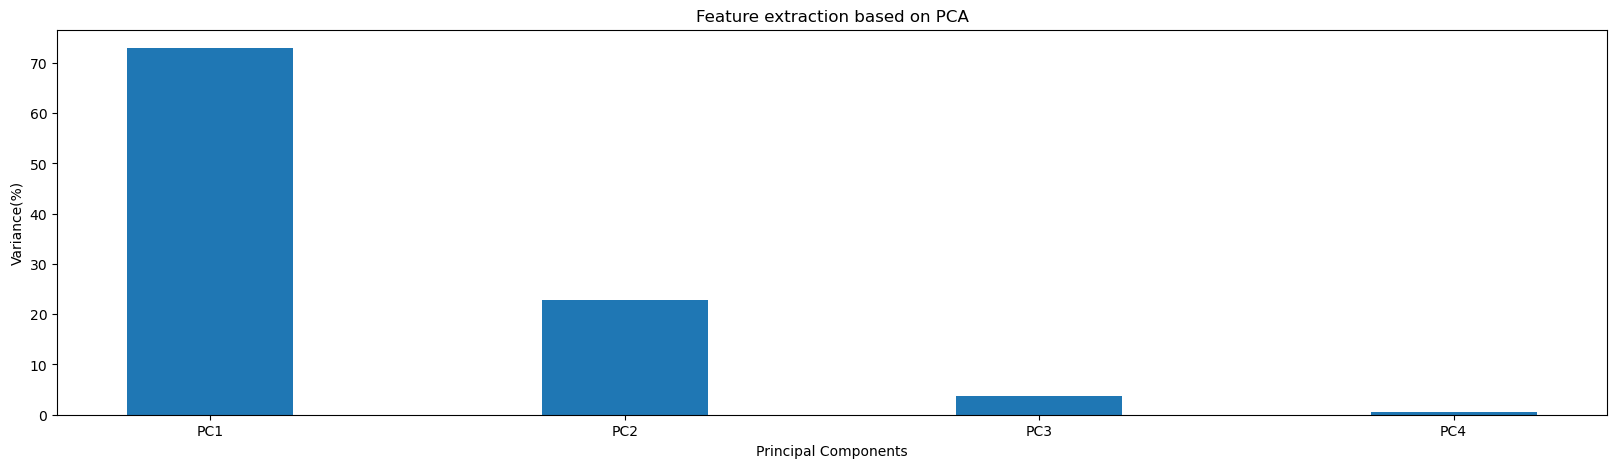

In [143]:
plt.figure(figsize=(20,5))
plt.bar(final_table.columns,final_table.loc['Variance(%)'],width = 0.4)
plt.xlabel('Principal Components')
plt.ylabel('Variance(%)')
plt.title('Feature extraction based on PCA')

Text(0.5, 1.0, 'Feature extraction based on PCA')

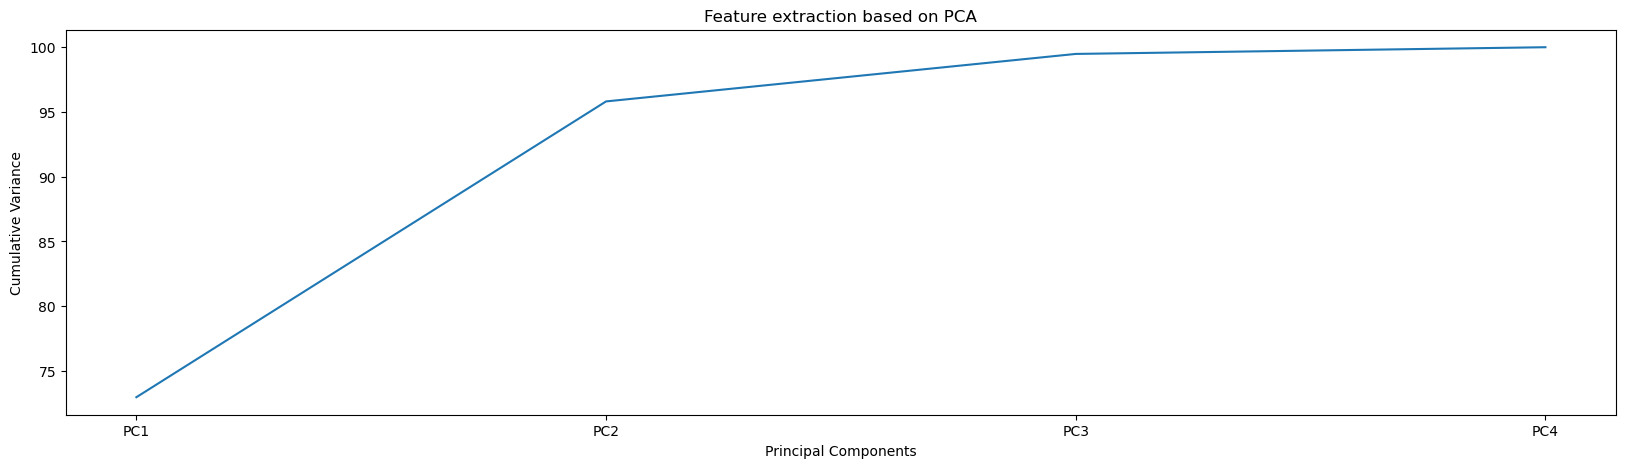

In [144]:
plt.figure(figsize=(20,5))
plt.plot(final_table.columns,final_table.loc['Cumulative Variance'])
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance')
plt.title('Feature extraction based on PCA')

In [145]:
# selecting principal components that contain 95% varinace or information

l = list()

for i in final_table.columns:
    l.append(i)
    if final_table[i]['Cumulative Variance'] > 95 :
        break
print('The principal component(s) that cover more than 95% information are ',l)

The principal component(s) that cover more than 95% information are  ['PC1', 'PC2']


In [146]:
# extracted principal components

extracted_table = final_table[l]
extracted_table

,PC1,PC2
Variance,2.918498,0.914030
Variance(%),72.962445,22.850762
Cumulative Variance,72.962445,95.813207


In [147]:
# or we just can extract the number of principal components we want

l = list()
no_of_component = 2
count = 0

for i in final_table.columns:
    l.append(i)
    count = count + 1
    if count == no_of_component :
        break
print('The principal component(s) are ',l)

The principal component(s) are  ['PC1', 'PC2']


In [148]:
# extracted principal components

extracted_table = final_table[l]
extracted_table

,PC1,PC2
Variance,2.918498,0.914030
Variance(%),72.962445,22.850762
Cumulative Variance,72.962445,95.813207


# KNN Implementation on Principal Components

## Data Set

In [149]:
extracted_table.columns

Index(['PC1', 'PC2'], dtype='object')

In [150]:
transformed_table[extracted_table.columns]

,PC1,PC2
0,-2.257141,-0.478424
1,-2.074013,0.671883
2,-2.356335,0.340766
3,-2.291707,0.595400
4,-2.381863,-0.644676
...,...,...
145,1.864258,-0.385674
146,1.559356,0.893693
147,1.516091,-0.268171
148,1.368204,-1.007878


In [151]:
df = transformed_table[extracted_table.columns]
df

,PC1,PC2
0,-2.257141,-0.478424
1,-2.074013,0.671883
2,-2.356335,0.340766
3,-2.291707,0.595400
4,-2.381863,-0.644676
...,...,...
145,1.864258,-0.385674
146,1.559356,0.893693
147,1.516091,-0.268171
148,1.368204,-1.007878


In [152]:
df['target'] = iris['target']
df

C:\Users\HP\AppData\Local\Temp\ipykernel_21672\2459886525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = iris['target']


,PC1,PC2,target
0,-2.257141,-0.478424,0
1,-2.074013,0.671883,0
2,-2.356335,0.340766,0
3,-2.291707,0.595400,0
4,-2.381863,-0.644676,0
...,...,...,...
145,1.864258,-0.385674,2
146,1.559356,0.893693,2
147,1.516091,-0.268171,2
148,1.368204,-1.007878,2


In [153]:
df.columns 

Index(['PC1', 'PC2', 'target'], dtype='object')

In [154]:
n = len(df.columns)
n

3

In [155]:
df[df.columns[n-1]].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [156]:
df[df.columns[n-1]].value_counts().index

Int64Index([0, 1, 2], dtype='int64')

In [157]:
df[df.columns[n-1]].nunique()

3

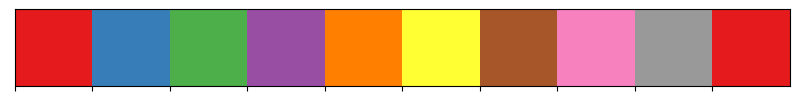

In [158]:
custom_palette = sns.color_palette("Set1",10)
sns.palplot(custom_palette)

https://www.codecademy.com/article/seaborn-design-ii

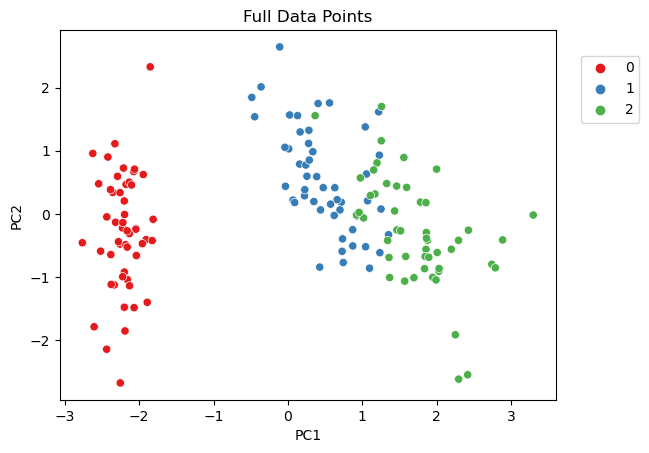

In [159]:
custom_palette = sns.color_palette("Set1", df[df.columns[2]].nunique()+1)
color_dict = dict()
markers_dict = dict()
j = 0

for i in df[df.columns[2]].value_counts().index:
    color_dict[i] = custom_palette[j]
    markers_dict[i] = 'o'
    j = j + 1

color_dict['Test Point'] = custom_palette[2]
markers_dict['Test Point'] = 'X'

# print(color_dict)
# print(markers_dict)

sns.scatterplot(x = df[df.columns[0]],y = df[df.columns[1]],hue=df[df.columns[2]],palette=color_dict,style=df[df.columns[2]],markers=markers_dict)
plt.title('Full Data Points')
plt.legend(loc=(1.05,0.75))

## Determing the value of K

In [160]:
len(df)

150

In [161]:
k = math.floor(math.sqrt(len(df)))

if k%2==0 :
    k = k + 1

print(k)

13


## Train Test split

In [162]:
train_percentage = 85
test_percentage = 100 - train_percentage

print('Train Percentage :',train_percentage)
print('Test Percentage :',test_percentage)

Train Percentage : 85
Test Percentage : 15


In [163]:
no_of_train_data = math.ceil((train_percentage * len(df)) / 100)
print('No of train data :',no_of_train_data)

no_of_test_data = len(df) - no_of_train_data
print('No of test data',no_of_test_data)

No of train data : 128
No of test data 22


In [164]:
df.head(no_of_train_data)

,PC1,PC2,target
0,-2.257141,-0.478424,0
1,-2.074013,0.671883,0
2,-2.356335,0.340766,0
3,-2.291707,0.595400,0
4,-2.381863,-0.644676,0
...,...,...,...
123,1.328781,0.480202,2
124,1.695055,-1.010536,2
125,1.947801,-1.004413,2
126,1.171180,0.315338,2


In [165]:
df_train = df.head(no_of_train_data)
df_train

,PC1,PC2,target
0,-2.257141,-0.478424,0
1,-2.074013,0.671883,0
2,-2.356335,0.340766,0
3,-2.291707,0.595400,0
4,-2.381863,-0.644676,0
...,...,...,...
123,1.328781,0.480202,2
124,1.695055,-1.010536,2
125,1.947801,-1.004413,2
126,1.171180,0.315338,2


In [166]:
df.tail(no_of_test_data)

,PC1,PC2,target
128,1.782379,0.186736,2
129,1.857425,-0.560413,2
130,2.427820,-0.258419,2
131,2.297232,-2.617554,2
132,1.856484,0.177953,2
133,1.110428,0.291945,2
134,1.198458,0.808606,2
135,2.789426,-0.853943,2
136,1.570993,-1.065013,2
137,1.341797,-0.421020,2


In [167]:
df_test = df.tail(no_of_test_data)
df_test

,PC1,PC2,target
128,1.782379,0.186736,2
129,1.857425,-0.560413,2
130,2.427820,-0.258419,2
131,2.297232,-2.617554,2
132,1.856484,0.177953,2
133,1.110428,0.291945,2
134,1.198458,0.808606,2
135,2.789426,-0.853943,2
136,1.570993,-1.065013,2
137,1.341797,-0.421020,2


In [168]:
df_test = df_test.reset_index()
df_test

,index,PC1,PC2,target
0,128,1.782379,0.186736,2
1,129,1.857425,-0.560413,2
2,130,2.427820,-0.258419,2
3,131,2.297232,-2.617554,2
4,132,1.856484,0.177953,2
5,133,1.110428,0.291945,2
6,134,1.198458,0.808606,2
7,135,2.789426,-0.853943,2
8,136,1.570993,-1.065013,2
9,137,1.341797,-0.421020,2


In [169]:
df_test = df_test.drop('index',axis=1)
df_test

,PC1,PC2,target
0,1.782379,0.186736,2
1,1.857425,-0.560413,2
2,2.427820,-0.258419,2
3,2.297232,-2.617554,2
4,1.856484,0.177953,2
5,1.110428,0.291945,2
6,1.198458,0.808606,2
7,2.789426,-0.853943,2
8,1.570993,-1.065013,2
9,1.341797,-0.421020,2


In [170]:
df_temp = df.copy()
df_temp

,PC1,PC2,target
0,-2.257141,-0.478424,0
1,-2.074013,0.671883,0
2,-2.356335,0.340766,0
3,-2.291707,0.595400,0
4,-2.381863,-0.644676,0
...,...,...,...
145,1.864258,-0.385674,2
146,1.559356,0.893693,2
147,1.516091,-0.268171,2
148,1.368204,-1.007878,2


In [171]:
df_temp[df_temp.columns[n-1]][no_of_train_data:] = ['Test Point'] * no_of_test_data
df_temp

C:\Users\HP\AppData\Local\Temp\ipykernel_21672\1914136751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[df_temp.columns[n-1]][no_of_train_data:] = ['Test Point'] * no_of_test_data


,PC1,PC2,target
0,-2.257141,-0.478424,0
1,-2.074013,0.671883,0
2,-2.356335,0.340766,0
3,-2.291707,0.595400,0
4,-2.381863,-0.644676,0
...,...,...,...
145,1.864258,-0.385674,Test Point
146,1.559356,0.893693,Test Point
147,1.516091,-0.268171,Test Point
148,1.368204,-1.007878,Test Point


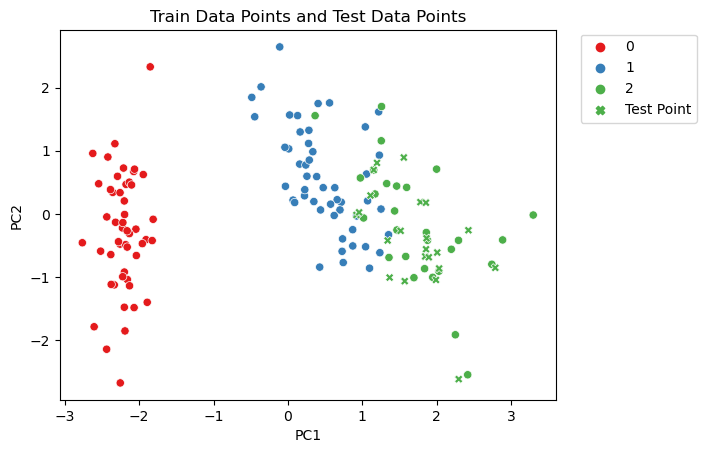

In [172]:
sns.scatterplot(x = df_temp[df_temp.columns[0]],y = df_temp[df_temp.columns[1]],hue=df_temp[df_temp.columns[2]],palette=color_dict,style=df_temp[df_temp.columns[2]],markers=markers_dict)
plt.title('Train Data Points and Test Data Points')
plt.legend(loc=(1.05,0.75))

# hue without palette : sns will provide default color for each group or class in df_temp['Cancer Present]
# huw with palette : sns will provide color we want for each group or class in df_temp['Cancer Present]
# style without markers : sns will provide default shape for each group or class in df_temp['Cancer Present]
# style with markers : sns will provide shape we want for each group or class in df_temp['Cancer Present]


## Calculating Euclean Distance from Test point to Train point , sorting it ascending order and then finding the nearest neighbor

In [173]:
df_train

,PC1,PC2,target
0,-2.257141,-0.478424,0
1,-2.074013,0.671883,0
2,-2.356335,0.340766,0
3,-2.291707,0.595400,0
4,-2.381863,-0.644676,0
...,...,...,...
123,1.328781,0.480202,2
124,1.695055,-1.010536,2
125,1.947801,-1.004413,2
126,1.171180,0.315338,2


In [174]:
df_test

,PC1,PC2,target
0,1.782379,0.186736,2
1,1.857425,-0.560413,2
2,2.427820,-0.258419,2
3,2.297232,-2.617554,2
4,1.856484,0.177953,2
5,1.110428,0.291945,2
6,1.198458,0.808606,2
7,2.789426,-0.853943,2
8,1.570993,-1.065013,2
9,1.341797,-0.421020,2


In [175]:
df_test.iloc[0]

PC1       1.782379
PC2       0.186736
target    2.000000
Name: 0, dtype: float64

In [176]:
df_train.iloc[0][0]

-2.2571411756481194

In [177]:
df_train[df.columns[n-1]][0]

0

In [178]:
df_train.columns

Index(['PC1', 'PC2', 'target'], dtype='object')

In [179]:
distance_list = list()
class_name_list = list()
total_distance = 0

# calculating euclidean distance from test data to train data

for i in range(len(df_test)):
    for j in range(len(df_train)):
        for c in range(n-1):
            distance = (df_test.iloc[i][c] - df_train.iloc[j][c])**2
            total_distance = total_distance + distance
        total_distance = math.sqrt(total_distance)
        distance_list.append((df_train[df_train.columns[n-1]][j],total_distance))
        total_distance = 0
    
    
    # sorting all those distances

    for ii in range(len(distance_list)):
        for jj in range(ii+1,len(distance_list)):
            if distance_list[jj][1] < distance_list[ii][1]:
                temp = distance_list[ii]
                distance_list[ii] = distance_list[jj]
                distance_list[jj] = temp
    

    # selecting first 'k' points and then counting the number of classes
    
    count = dict()
    for ii in range(k):
        if distance_list[ii][0] not in count:
            count[distance_list[ii][0]] = 1
        else:
            count[distance_list[ii][0]] = count[distance_list[ii][0]] + 1
    
    
    # finding out the most nearest class

    min = 0
    for ii in count:
        if count[ii] > min:
            class_name = ii
            min = count[ii]
    
    class_name_list.append(class_name)
    distance_list = list()

print(class_name_list)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]


In [180]:
print(len(class_name_list))

22


In [181]:
df_temp2 = df.copy()
df_temp2

,PC1,PC2,target
0,-2.257141,-0.478424,0
1,-2.074013,0.671883,0
2,-2.356335,0.340766,0
3,-2.291707,0.595400,0
4,-2.381863,-0.644676,0
...,...,...,...
145,1.864258,-0.385674,2
146,1.559356,0.893693,2
147,1.516091,-0.268171,2
148,1.368204,-1.007878,2


In [182]:
df_temp2[df_temp2.columns[n-1]][no_of_train_data:] = class_name_list
df_temp2

C:\Users\HP\AppData\Local\Temp\ipykernel_21672\2165292902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp2[df_temp2.columns[n-1]][no_of_train_data:] = class_name_list


,PC1,PC2,target
0,-2.257141,-0.478424,0
1,-2.074013,0.671883,0
2,-2.356335,0.340766,0
3,-2.291707,0.595400,0
4,-2.381863,-0.644676,0
...,...,...,...
145,1.864258,-0.385674,2
146,1.559356,0.893693,2
147,1.516091,-0.268171,2
148,1.368204,-1.007878,2


In [183]:
color_dict 

{0: (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 1: (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 2: (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 'Test Point': (0.30196078431372547, 0.6862745098039216, 0.2901960784313726)}

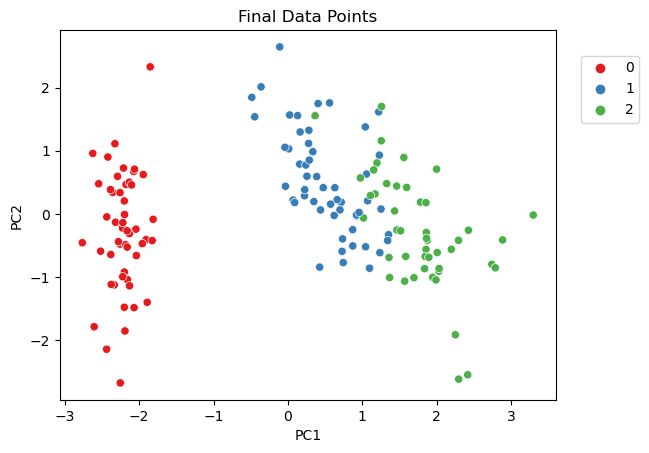

In [184]:
sns.scatterplot(x = df_temp2[df_temp2.columns[0]],y = df_temp2[df_temp2.columns[1]],hue=df_temp2[df_temp2.columns[2]],palette=color_dict,style=df_temp2[df_temp2.columns[2]],markers=markers_dict)
plt.title('Final Data Points')
plt.legend(loc=(1.05,0.75))

Text(0.5, 1.0, 'Final Data Points')

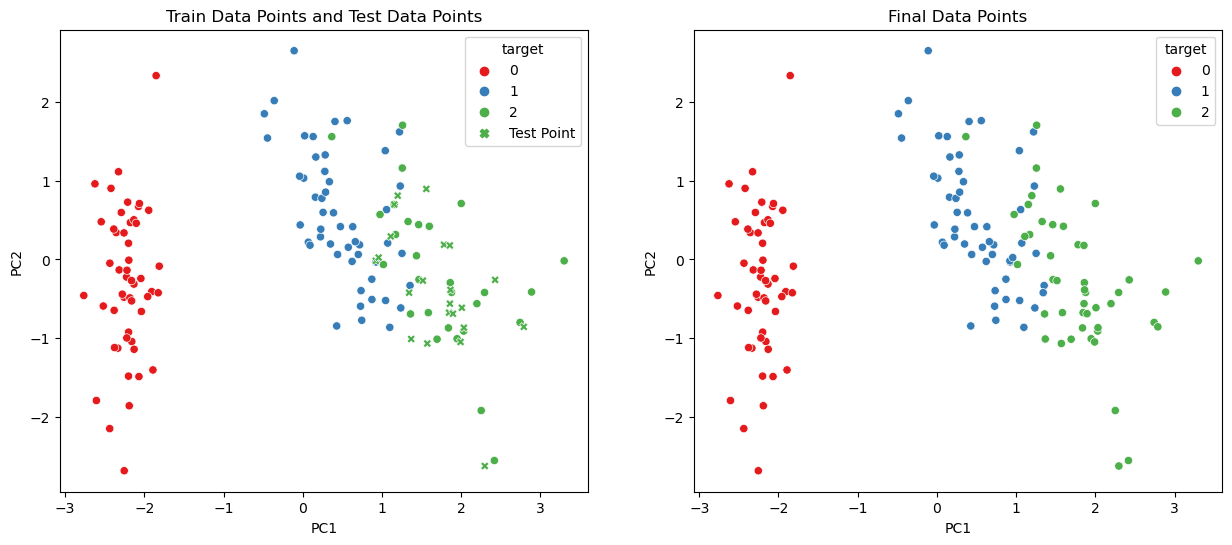

In [185]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1) # row 1, col 2 index 1

sns.scatterplot(x = df_temp[df_temp.columns[0]],y = df_temp[df_temp.columns[1]],hue=df_temp[df_temp.columns[2]],palette=color_dict,style=df_temp[df_temp.columns[2]],markers=markers_dict)
plt.title('Train Data Points and Test Data Points')

# hue without palette : sns will provide default color for each group or class in df_temp['Cancer Present]
# huw with palette : sns will provide color we want for each group or class in df_temp['Cancer Present]
# style without markers : sns will provide default shape for each group or class in df_temp['Cancer Present]
# style with markers : sns will provide shape we want for each group or class in df_temp['Cancer Present]





plt.subplot(1, 2, 2) # index 2


sns.scatterplot(x = df_temp2[df_temp2.columns[0]],y = df_temp2[df_temp2.columns[1]],hue=df_temp2[df_temp2.columns[2]],palette=color_dict,style=df_temp2[df_temp2.columns[2]],markers=markers_dict)
plt.title('Final Data Points')

In [186]:
right = 0
wrong = 0

for i in range(len(class_name_list)):
    if class_name_list[i] == df_test[df_test.columns[n-1]][i]:
        right = right + 1
    else:
        wrong = wrong + 1

print(right,wrong)

19 3


In [187]:
accuarcy = (right * 100) / len(class_name_list)
print(accuarcy)

86.36363636363636
